In [1]:
import numpy as np
import pandas as pd

In [30]:
# configure plots
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 6

# Data

## Raw Data

In [3]:
X = pd.read_csv('./9_Station/X.csv', index_col=0)
y = pd.read_csv('./9_Station/y.csv', index_col=0)

## Fill NaN

In [4]:
X = X.fillna(0)

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

# Baseline Model

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 80, max_depth = 10)

In [22]:
regressor_RF.fit(X_train, y_train['q/pt'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
y_pred = regressor_RF.predict(X_test)

# Visualize Baseline Model

In [24]:
visual = y_test.reset_index()

In [25]:
visual = y_test.reset_index()

In [26]:
visual['q/pt_pred'] = y_pred
visual['pt_pred'] = visual['q'] / visual['q/pt_pred']

In [27]:
visual['delta_1/pt'] = 1/visual['pt'] - 1/visual['pt_pred']

In [45]:
visual['delta_1/pt'].min()

-0.36711391389755926

### ABS

In [193]:
# visual['pt_abs'] = visual['pt'].abs()

### Selection

In [38]:
visual = visual[visual['pt_pred']>0]

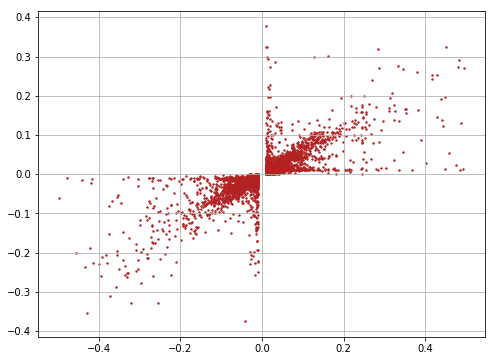

In [39]:
fig, ax = plt.subplots()
ax.scatter(visual['q/pt'], visual['q/pt_pred'], color='firebrick', s = 2, alpha = 1)
ax.grid(True)

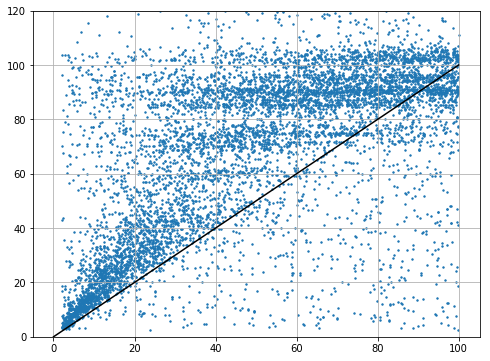

In [40]:
fig, ax = plt.subplots()
line = [0, 100]
ax.plot(line, line, color = 'black')
ax.scatter(visual['pt'], visual['pt_pred'], 
#            c = visual['eta_median'], cmap = 'copper', 
           s = 2, alpha = 1)
plt.ylim(0, 120) 
ax.grid(True)

## Bias and Resolution

In [41]:
points = range(2, 100)
bias = []
resolution = []

In [42]:
for i in points:
    temp = visual[(visual['pt']>i) & (visual['pt']<i+1)]
    bias.append(temp['delta_1/pt'].mean())
    resolution.append(2 * temp['delta_1/pt'].std())
#     resolution.append((temp['delta_1/pt'].max() - temp['delta_1/pt'].min())/2)

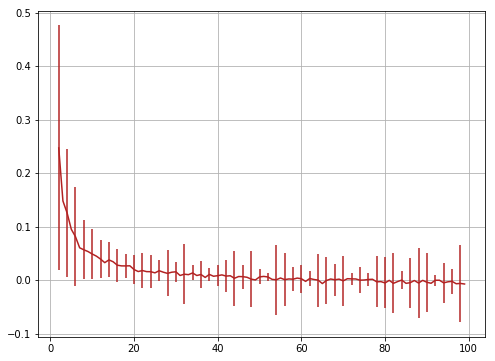

In [46]:
fig, ax = plt.subplots()
ax.errorbar(points, bias, color='firebrick', yerr=resolution, errorevery=2)
plt.ylim(-0.1, 0.4)
ax.grid(True)
# ax.set_title('all errorbars')

# NN

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [8]:
X.shape

(50807, 57)

In [9]:
# 搭建模型
def create_model():
    classifier = Sequential()
    # 输入层及第一个隐藏层
    classifier.add(Dense(activation="relu", 
                         input_dim=57, 
                         units=80, 
                         kernel_initializer="uniform"))
    # 第二个隐藏层
    classifier.add(Dense(activation="relu", 
                         units=50, 
                         kernel_initializer="uniform"))
    # 第三个隐藏层
    classifier.add(Dense(activation="relu", 
                         units=30, 
                         kernel_initializer="uniform"))
    # 输出层
    classifier.add(Dense(activation="linear", 
                         units=1, 
                         kernel_initializer="uniform"))
    
    classifier.compile(optimizer = 'adam', 
                       loss = 'mse', 
                       metrics = ['mse'])
    return classifier

model = KerasRegressor(build_fn=create_model)

In [10]:
model.fit(X_train,y_train['q/pt'], batch_size=5, epochs = 50)

Epoch 1/50
40645/40645 [==============================] - 16s 385us/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 2/50
40645/40645 [==============================] - 16s 404us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 3/50
40645/40645 [==============================] - 14s 347us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 4/50
40645/40645 [==============================] - 16s 386us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 5/50
40645/40645 [==============================] - 14s 342us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 6/50
40645/40645 [==============================] - 14s 356us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 7/50
40645/40645 [==============================] - 15s 364us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 8/50
40645/40645 [==============================] - 15s 364us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 9/50
40645/40645 [==============================] - 14s 34

In [12]:
y_pred = model.predict(X_test)

# Visualize NN Model

In [11]:
visual = y_test.reset_index()

In [13]:
visual['q/pt_pred'] = y_pred
visual['pt_pred'] = visual['q'] / visual['q/pt_pred']

In [14]:
visual['delta_1/pt'] = 1/visual['pt'] - 1/visual['pt_pred']

### ABS

In [193]:
# visual['pt_abs'] = visual['pt'].abs()

### Selection

In [201]:
# visual = visual[visual['pt']>0]

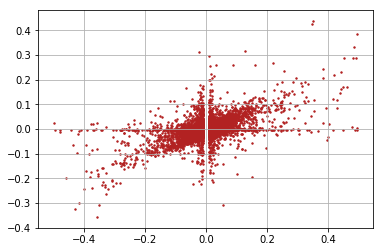

In [15]:
fig, ax = plt.subplots()
ax.scatter(visual['q/pt'], visual['q/pt_pred'], color='firebrick', s = 2, alpha = 1)
ax.grid(True)

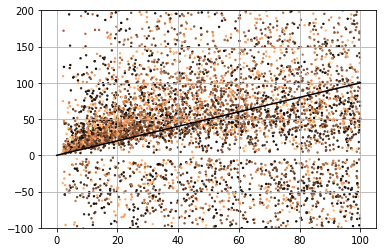

In [18]:
fig, ax = plt.subplots()
line = [0, 100]
ax.plot(line, line, color = 'black')
ax.scatter(visual['pt'], visual['pt_pred'], c = visual['eta_median'], cmap = 'copper', s = 2, alpha = 1)
plt.ylim(-100, 200) 
ax.grid(True)